Predicting Diagnosis Of Heart Disease Based On Age, Cholesterol, Blood Pressure Levels

**Introduction:**

Heart disease has been the leading cause of death in many countries. The term heart disease describes a range of conditions that could affect the heart. The most common heart diseases are coronary heart disease, peripheral artery disease, and aortic disease. (CDC,2023)
Studies show that the leading risk factors for these diseases include cholesterol levels and maximum heart rate. In particular, adults age 65 and older are more likely than younger people to suffer from heart disease beacause aging can cause changes in the heart and blood vessels that may increase a person's risk of developing cardiovascular disease (U.S. Department of Health, n.d.). Consequently, our goal is to identify which heart health indicators most significantly contributes to the identification of heart disease, and use knn classifier algorith to classify an indivial as either likley or not likely to have heart disease based off the predictors. 


This classification uses processed.cleveland.data retreived from the Heart Disease Database to predict if a new patient is likely to have heart disease. The data uses 14 attributes:

1. age: age of the patient(years)
2. sex: sex of the patient(M: Male, F: Female)
3. cp: chest pain type(TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
4. trestbps: resting blood pressure(#)
5. chol: serum cholesterol in mg/dl(#)
6. fbs: fasting blood sugar > 120 mg/dl(Binary)(1=true; 0=false)
7. restecg: resting electrocardiography results(values 0,1,2)
8. thalach: maximum heart rate achieved (#)
9. exang: exercise induced angina (binary) (1 = yes; 0 = no)
10. oldpeak: oldpeak = ST (Numeric value measured in depression)
11. slope: of the peak exercise ST segment (Ordinal)(Value 1: up sloping , Value 2: flat , Value 3: down sloping)
12. ca: number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. thal: maximum heart rate achieved — (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversible defect
14. num (the predicted attribute)


According to previous research, we hypothesize that people with higher heart rate, age and cholestrol levels are more likely to be at risk of heart disease. Thus, our research question is: 
Is a new patient likely to have heart disease, based on the patient's cholestrol levels, maximun heart rate acheived and age?

We will solve this using a knn classifier algorithm using these three predictors (age, chol, thalach) to classify an individual as either positive or negative for Heart Disease.


**Methods:** Preprocessing and exploratory data analysis

1. We will import the dataset from the internet onto jupyter notebook. This is using read_csv to import the processed.cleveland.data dataset from the online directory.

2. We will tidy the dataset to make it usable. There is many properties of the dataset that needs to be tidied. 

Checking for missing values in the dataset. The process revolves around inspecting each and single dataframe and check for non numerical values that do not fit into our goal of data analysis. This process can be complex as the data that we inspect do not measure missing data as "NA", but rather "?", such that the functions to detect NAs such as "is.na" could not be used. As such, the method used to filter for "?" in our data is to isolate each variable and look for "?". As a result, we found "?" in the "age", "cholesterol" and "thalach" columns, which does not affect the variables that we are interested in.

The predicted attribte is the "num" column which indicates the diagnosis of heart disease. According to the data description, a value of 0 represents presence of heart disease; any value that is not 0 represents no presense of heart disease. To change the predicted attribute to be catagorical, the ifelse function was used to convert any non-zero numbers to 1. The final result of the prediction is now either 0 (presence of heart disease) or 1 (no presence heart disease).

3. Split the data into training and testing sets, working only with the training set until the very end.

4. Summarize the training set to make predictions about how we want our classifier to work.
this is done by grouping by diagnosis, and summarize the mean of all of the numeric columns


5. Visualize the relationship between thalach, age and chol to get a deeper understanding of how the data is distributed.

For our visualization, we will be using scatterplots to visually check if there exist some relation between numeric variables. Since scatter plots are dispersion graphs built to represent the data points of variables, we believe this will be an effective way to visualize and predict values. Histograms will also be used to observe the distribution of different attributes.



In [2]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
url<- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

data <- read_csv(url, c("age", "sex", "cp", "blood_pressure", "cholesterol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
data


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, blood_pressure, cholesterol, fbs, restecg, thalach, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [11]:
#checking for missing data
missing1 <- data |> 
summarize(age) |>
filter(age == "?")


missing2 <- data |> 
summarize(thalach) |>
filter(thalach == "?")

missing3 <- data |> 
summarize(cholesterol) |>
filter(cholesterol == "?")

missing1
missing2
missing3

#there seems to be no missing data as the is no "?" in the predictor columns

age
<dbl>


thalach
<dbl>


cholesterol
<dbl>


In [8]:
#tidying data
cleve_clean <- data |>
    mutate(diagnosis = ifelse(num >= 1, 1, 0), diagnosis = as.factor(diagnosis), sex = as.factor(sex), 
           cp = as.factor (cp), fbs= as.factor(fbs), restecg=as.factor(restecg), exang = as.factor(exang), 
           thal = as.factor(thal), ca = as.factor(ca), 
           slope = as.factor(slope)) |>
    select(-num)

The predicted attribte is the "num" column which indicates the diagnosis of heart disease. According to the data description, a value of 0 represents presence of heart disease; any value that is not 0 represents no presense of heart disease. To change the predicted attribute to be catagorical, the ifelse function was used to convert any non-zero numbers to 1. The final result of the prediction is now either 0 (presence of heart disease) or 1 (no presence heart disease).


In [9]:
#splitting data
cleve_split <- initial_split(cleve_clean, prop = 0.75, strata = diagnosis)

cleve_training <- training(cleve_split)
cleve_testing <- testing(cleve_split)

In [10]:
#summarizing data

summarize_all <- cleve_training |>
                    group_by(diagnosis) |>
                    summarize(age = mean(age),
                              blood_pressure = mean(blood_pressure),
                              cholesterol = mean(cholesterol),
                              thalach = mean(thalach),
                              oldpeak = mean(oldpeak),
                              patient_count = n())

summarize_all

diagnosis,age,blood_pressure,cholesterol,thalach,oldpeak,patient_count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,53.46341,129.4878,246.2033,157.2195,0.5463415,123
1,57.04808,134.8654,251.7308,137.2019,1.7298077,104


**Visualizing Data Using Scatterplots**

In [ ]:
#visializing data (OLD - USING HISTOGRAMS)

#options(repr.plot.width = 7, repr.plot.height = 7)

#age_plot <- ggplot(cleve_training, aes(x = age)) +
 # geom_histogram(bins = 30) +
   # labs(x = "Age", y = "Frequency") + 
  #  ggtitle("Distribution of age of the population") +
   # theme(text = element_text(size = 20)) +
   # theme(plot.title = element_text(hjust = 0.5)) +
   # theme(axis.title.x = element_blank()) 

#chol_plot <- ggplot(cleve_training, aes(x = cholesterol)) +
   # geom_histogram(bins = 30) + 
   # labs(x = "Cholesterol Levels", y = "Frequency") + 
    #ggtitle("Cholesterol Levels") +
  #  theme(text = element_text(size = 20)) +
   # theme(plot.title = element_text(hjust = 0.5)) +
   # theme(axis.title.x = element_blank()) 

#bp_plot <- ggplot(cleve_training, aes(x = blood_pressure)) +
   # geom_histogram(bins = 30) +
  #  labs(x = "Blood Pressure", y = "Frequency") + 
  #  ggtitle("Blood Pressure") +
    #theme(text = element_text(size = 20)) +
   # theme(plot.title = element_text(hjust = 0.5)) +
   # theme(axis.title.x = element_blank()) 

#age_plot
#chol_plot
#bp_plot

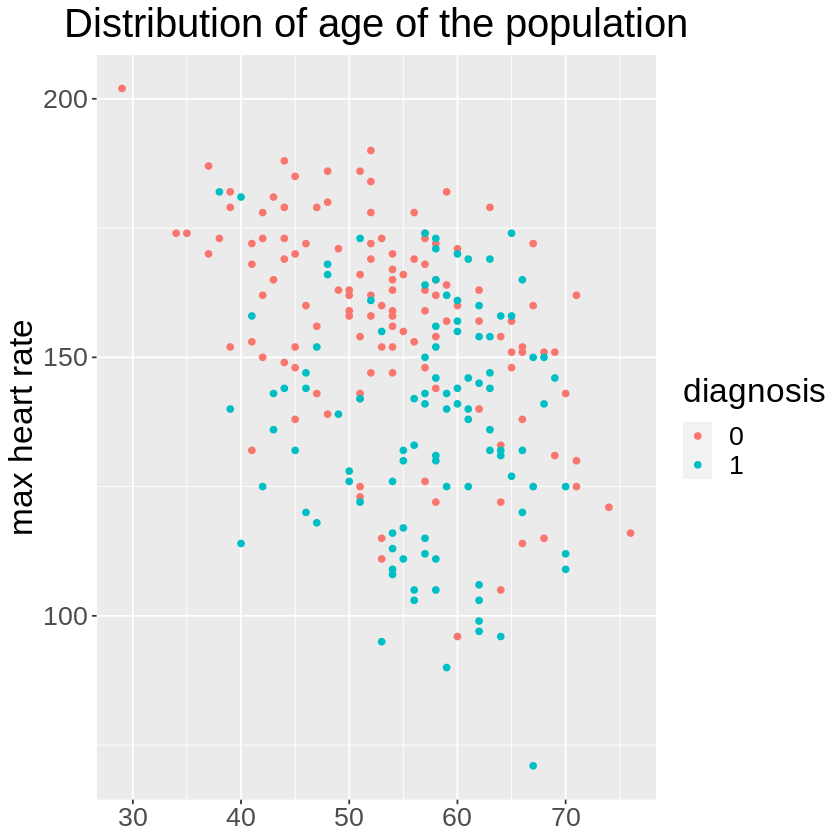

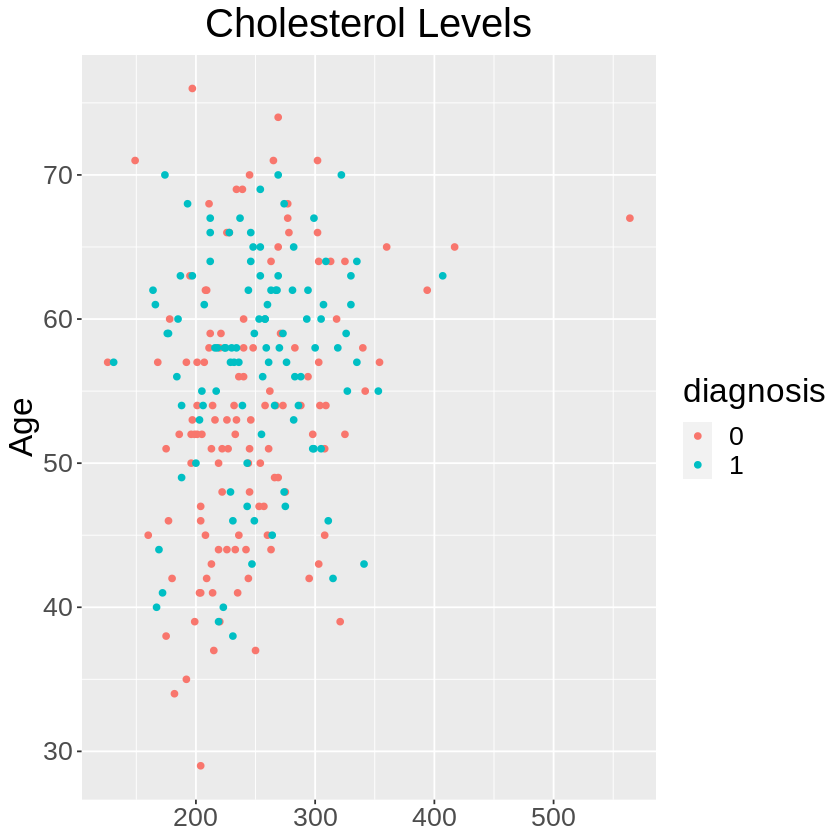

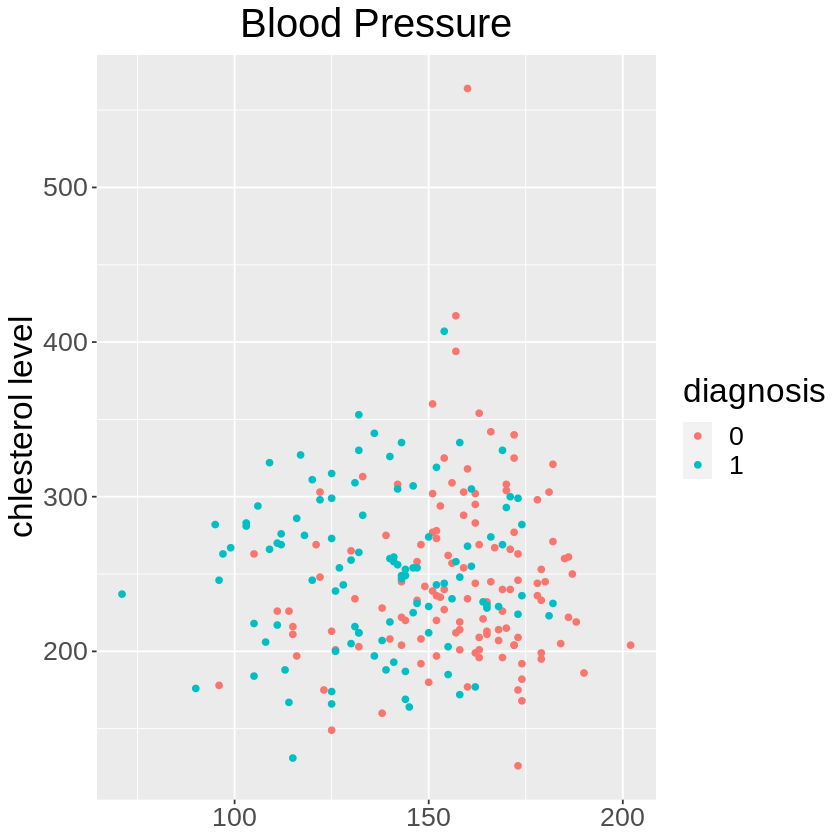

In [13]:
options(repr.plot.width = 7, repr.plot.height = 7)

age_plot <- ggplot(cleve_training, aes(x = age, y=thalach, color = diagnosis)) +
  geom_point() +
    labs(x = "Age", y = "max heart rate") + 
    ggtitle("Distribution of age of the population") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.title.x = element_blank()) 

chol_plot <- ggplot(cleve_training, aes(x = cholesterol, y = age, color = diagnosis)) +
    geom_point() + 
    labs(x = "Cholesterol Levels", y = "Age") + 
    ggtitle("Cholesterol Levels") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.title.x = element_blank()) 

bp_plot <- ggplot(cleve_training, aes(x = thalach, y= cholesterol, color = diagnosis)) +
    geom_point() +
    labs(x = "max heart rate", y = "chlesterol level") + 
    ggtitle("Blood Pressure") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.title.x = element_blank()) 

age_plot
chol_plot
bp_plot

Expected outcomes and significance:

We expect that patients with high cholesterol and blood pressure levels are more likely to have heart disease than those with lower levels. We believe that age will also significantly affect our results as health issues are more common in older adults. This increases the awareness for heart disease and may lead to future questions that explore how we may treat illnesses like these more effectively or even prevent them.

Bibliography: 

This project uses data from the Cleveland Clinic Foundation retreived from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 

Centers for Disease Control and Prevention. (2023, March 21). Heart disease. Centers for Disease Control and Prevention. Retrieved April 2, 2023, from https://www.cdc.gov/heartdisease/index.htm  


U.S. Department of Health and Human Services. (n.d.). Heart health and aging. National Institute on Aging. Retrieved April 2, 2023, from https://www.nia.nih.gov/health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older,risk%20of%20developing%20cardiovascular%20disease. 